In [1]:
# import required libraries
from util.combine_stream import get_arff_data_labels, plot_anomaly, plot_stream_drift
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [24]:
# declare constant values
SOURCE_DIR = "data/benchmark/ECG" # directory for source streams
OUTPUT_DIR = "data/synthetic/p_drift/p5" # directory for drift stream
COLOURS = {
    0: 'tab:blue',
    1: 'tab:green',
    2: 'tab:red',
    3: 'tab:cyan',
    4: 'tab:pink',
    5: 'tab:purple',
    'drift': 'gold'
}

In [3]:
# list files and select 6 that were used for combining
files = os.listdir(SOURCE_DIR)
files.sort()
selected_streams = files[2:8]

# store the ARFF data in ndarrays for plotting
Xs, ys = [], []
for s in selected_streams:
    X, y = get_arff_data_labels(os.path.join(SOURCE_DIR, s))
    Xs.append(X)
    ys.append(y)

# print details of selected streams
df = pd.read_csv(f'{SOURCE_DIR}/description.csv')
df.loc[df.filename.apply(lambda x: x in selected_streams)]

,filename,len,num_anomalies,total_anom_cover,avg_anomaly_len,percent_anomalies
2,MBA_ECG14046_data_10.arff,229900,107,8130,75.981308,0.035363
3,MBA_ECG14046_data_11.arff,229900,165,12746,77.248485,0.055441
4,MBA_ECG14046_data_12.arff,229900,169,14318,84.721893,0.062279
5,MBA_ECG14046_data_13.arff,229900,105,8265,78.714286,0.035950
6,MBA_ECG14046_data_14.arff,229900,128,10159,79.367188,0.044189
7,MBA_ECG14046_data_15.arff,229900,170,13066,76.858824,0.056833


In [28]:
def get_plot_params(filename, source_dir):
    output_path = f'{source_dir}/{filename}.arff'
    drift_label_path = f'{source_dir}/{filename}.csv'
    params_path = f'{source_dir}/{filename}_params.csv'
    X, y = get_arff_data_labels(output_path)
    drift_label = pd.read_csv(drift_label_path)
    drift_label = drift_label['0'].tolist()
    params_df = pd.read_csv(params_path)
    streams = params_df['streams'].tolist()
    positions = params_df['positions'].tolist()
    return X, y, drift_label, streams, positions

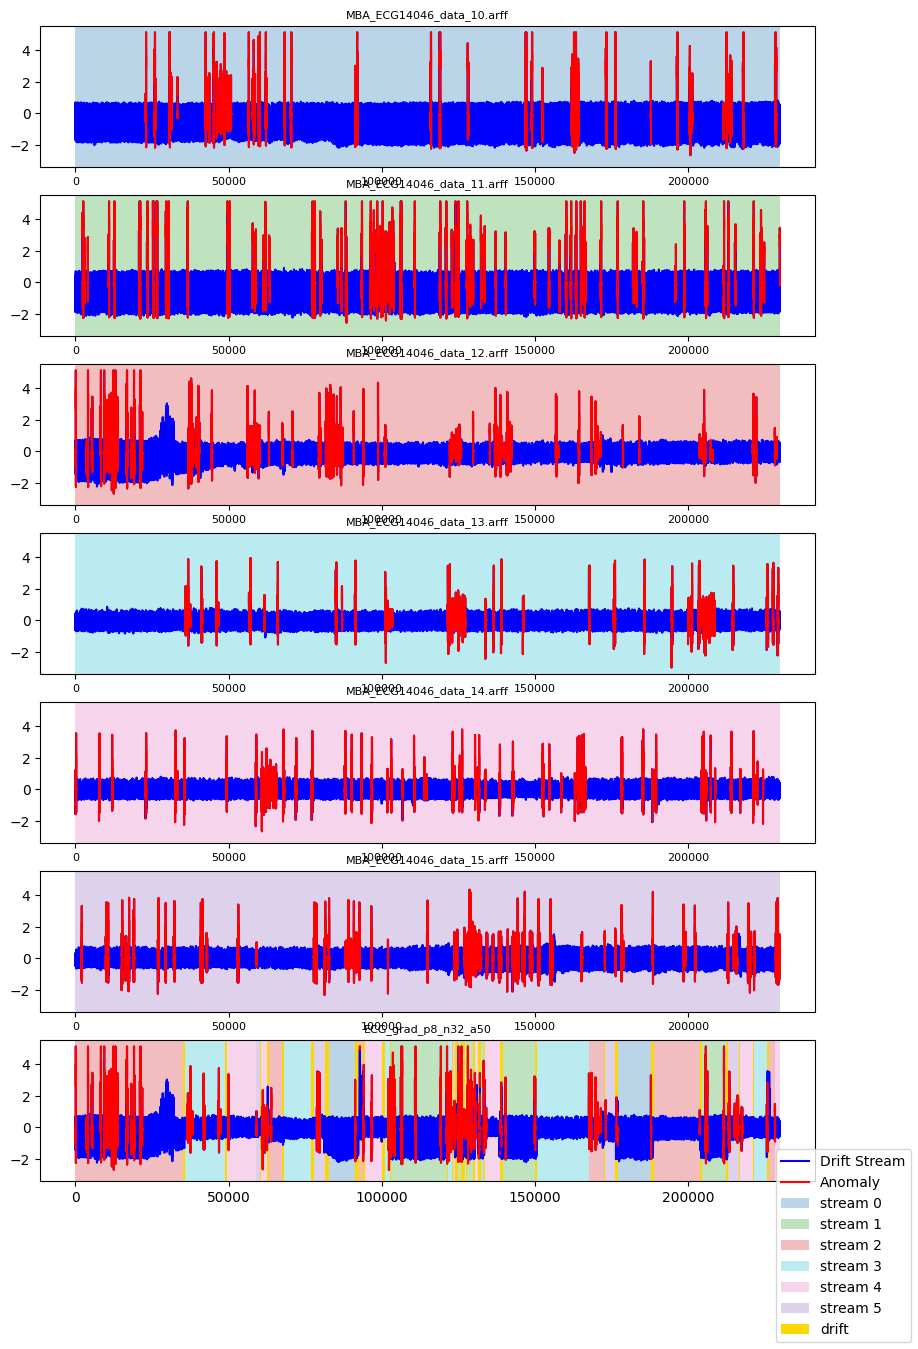

In [29]:
# plot source stream and drift stream
rows = int(len(selected_streams))
fig, ax = plt.subplots(rows + 1,1,figsize=(10,15), sharey=True)

# for each source stream, plot stream and background colour
end = len(ys[0])
for (i,s) in enumerate(selected_streams):
    X, y = Xs[i], ys[i]
    colour = COLOURS[i]
    plot_anomaly(X,y,ax[i],title=s,size=8, show_label=(i==0))
    ax[i].axvspan(0, end, facecolor=colour, alpha=0.3, label=f'stream {i}')
    ax[i].tick_params(axis='x', labelsize=8)

# plot drift stream
filename = 'ECG_grad_p8_n32_a50'
X, y, drift_label, streams, positions = get_plot_params(filename, OUTPUT_DIR)
plot_anomaly(X,y,ax[-1],title=filename,size=8)
plot_stream_drift(positions, drift_label, streams, ax[-1])
fig.legend(loc='lower right')

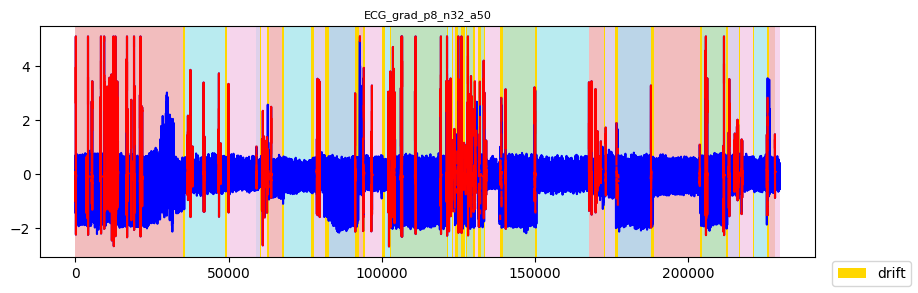

In [30]:
# only plot drift stream
fig, ax = plt.subplots(figsize=(10,3))
filename = 'ECG_grad_p8_n32_a50'
X, y, drift_label, streams, positions = get_plot_params(filename, OUTPUT_DIR)
plot_anomaly(X,y,ax,title=f'{filename}')
plot_stream_drift(positions, drift_label, streams, ax)
fig.legend(loc='lower right')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


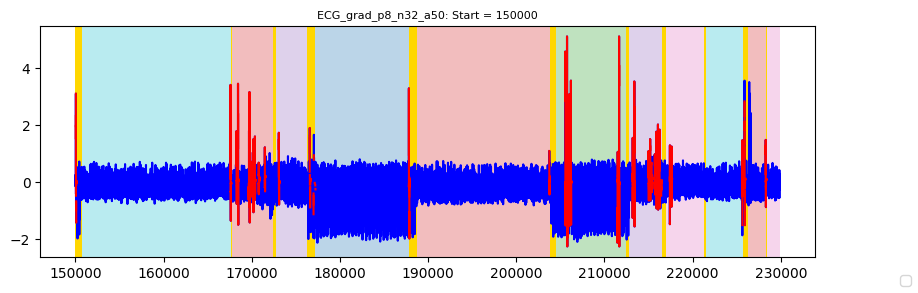

In [35]:
# plot stream with specified start point
start = 150000
fig, ax = plt.subplots(figsize=(10,3))
filename = 'ECG_grad_p8_n32_a50'
X, y, drift_label, streams, positions = get_plot_params(filename, OUTPUT_DIR)
plot_anomaly(X,y,ax,start=start,title=f'{filename}: Start = {start}') # specify start parameter
plot_stream_drift(positions, drift_label, streams, ax, start=start) # specify start parameter
fig.legend(loc='lower right')

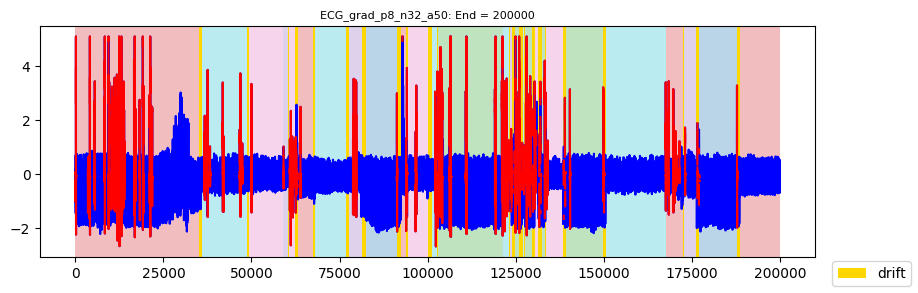

In [34]:
# plot stream with specified end point
end = 200000
fig, ax = plt.subplots(figsize=(10,3))
filename = 'ECG_grad_p8_n32_a50'
X, y, drift_label, streams, positions = get_plot_params(filename, OUTPUT_DIR)
plot_anomaly(X,y,ax,end=end,title=f'{filename}: End = {end}') # specify end parameter
plot_stream_drift(positions, drift_label, streams, ax, end=end) # specify end parameter
fig.legend(loc='lower right')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


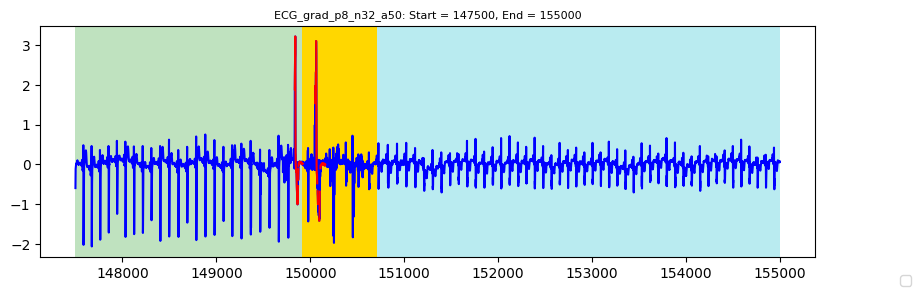

In [33]:
# plot stream within specified interval
start = 147500
end = 155000
fig, ax = plt.subplots(figsize=(10,3))
filename = 'ECG_grad_p8_n32_a50'
X, y, drift_label, streams, positions = get_plot_params(filename, OUTPUT_DIR)
plot_anomaly(X,y,ax,title=f'{filename}: Start = {start}, End = {end}',start=start, end=end) # specify start and end parameter
plot_stream_drift(positions, drift_label, streams, ax, start=start, end=end) # specify start and end parameter
fig.legend(loc='lower right')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


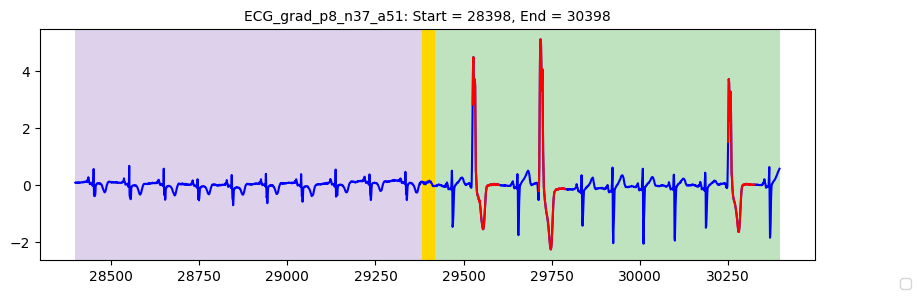

In [42]:
# Plotting ECG data (p_drift > p5)
drift_files = [
    'ECG_grad_p8_n32_a50',
    'ECG_grad_p8_n37_a51',
    'ECG_grad_p12_n37_a56'
]

# Select to plot one of the drift files listed above
i = 1 # index between 0 and 2 inclusive
fig, ax = plt.subplots(figsize=(10,3))
filename = drift_files[i]
X, y, drift_label, streams, positions = get_plot_params(filename, OUTPUT_DIR)

# Select k to center plot around the kth drift in stream
k = 5
start = positions[k] - 1000
end = positions[k] + 1000

plot_anomaly(X,y,ax,title=f'{filename}: Start = {start}, End = {end}',start=start, end=end) # specify start and end parameter
plot_stream_drift(positions, drift_label, streams, ax, start=start, end=end) # specify start and end parameter
fig.legend(loc='lower right')